In [21]:
%matplotlib inline

import pandas as pd
import pypyodbc as podbc
import plotly
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import kaleido
import plotly.io as pio
pio.kaleido.scope.default_format = "svg"
from plotly.offline import init_notebook_mode, plot_mpl
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [105]:
#Connect to RDS db
conn = podbc.connect(
    #Trusted_Connection='Yes',
    Driver='{SQL Server}',
    Server='nbahistorical.cmgzaupuq9dz.us-east-2.rds.amazonaws.com',
    UID='admin',
    PWD='Gs239350',
    Database='NBA_historical',
    MultipleActiveResultSets = 'True'
)

In [92]:
t1 = pd.read_sql(sql = "select player,team,d_score,mp from top_view where season = '1952-53' and team = 'nyk';",con = conn)

In [103]:
t1['ones'] = 1
fig = px.scatter(t1, x="mp", y=(t1['d_score']*(-1)),size = "ones", #color="team",
                 text = "player",
                labels={
                     "mp": "MINUTES",
                     "y": "D_SCORE",
                     "team":"TEAM"
                 },
                 title="The 1953 Knicks were a deep defensive team")

fig.update_layout(
    font=dict(
        size=12,
        color="Black"
    )
)

#fig.show()
fig.write_image("C:\\Users\gsteele\\nyk_1953.svg")

In [113]:
t1 = pd.read_sql(sql = "select player,team,o_score_pp,o_score_season,d_score,mp from top_view where season = '1952-53' and team in ('nyk','bos');",con = conn)

In [116]:
t1['ones'] = 1
fig = px.scatter(t1, x="o_score_season", y=(t1['d_score']*(-1)),size = "mp", color="team",
                 #text = "player",
                labels={
                     "o_score_season": "O_SCORE by volume",
                     "y": "D_SCORE",
                     "team":"TEAM",
                    "mp":"MP"
                 },
                 title="The 1953 Eastern Divsion Finals were a studied contrast")

fig.update_layout(
    font=dict(
        size=12,
        color="Black"
    )
)

#fig.show()
fig.write_image("C:\\Users\gsteele\\1953_eastern_finals.svg")

In [5]:
fg_table = pd.read_sql(sql = "select season,(sum(fgm) / sum(fga)) as fg_percentage from totals4 where cast(substring(season,1,4) as int) >1951 and cast(substring(season,1,4) as int) <= 1963 group by season order by season;",
con = conn)
all_fg_table = pd.read_sql_query(sql = """select 
season,
(sum(fgm) / sum(fga)) as fg_percentage
from totals4
where cast(substring(season,1,4) as int) >= 1963
group by season
order by season;""",
con = conn)

In [23]:
x = fg_table['season']
y = (fg_table['fg_percentage']*100)
x0 = all_fg_table['season']
y0 = (all_fg_table['fg_percentage']*100)
fg_fig = go.Figure()
fg_fig.update_layout(
    autosize=False,
    width=800)
fg_fig.update_layout(
    title="The Rise of Shooting Accuracy",
    xaxis_title="Season",
    yaxis_title="FG Percentage",
    font=dict(
        size=12,
        color="Black"
    )
)
fg_fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines+markers',
                    name='1953-1963'))
fg_fig.add_trace(go.Scatter(x=x0, y=y0,
                    mode='lines+markers',
                    name='1963-Present'))
fg_fig.write_image("C:\\Users\gsteele\Images\\fg_fig.svg")

In [24]:
t2 = pd.read_sql(sql = "select * from opponent_impact where defender = 'Mel Hutchins' and season_id = '1952-53';",con = conn)

In [14]:
dfig = go.Figure(go.Waterfall(
    name = "20", orientation = "v",
    #measure = t2["opponent_pointscreated_impact"],
    x = t2["game_id"],
    textposition = "outside",
    #text = ["+60", "+80", "", "-40", "-20", "Total"],
    y = t2["opponent_pointscreated_impact"],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

dfig.show()

In [63]:
shooting = pd.read_sql_query(sql = """select player,fgpercent,ts,round(ppg,1) as ppg 
from totals4 
where season = '1952-53'
and fgpercent < 1
;""",con = conn)

In [69]:
shooting2 = pd.read_sql_query(sql = """select season,player,fgpercent,ts,round(ppg,1) as ppg 
from totals4 
where cast(substring(season,1,4) as int) > 1951
and fgpercent < 1
;""",con = conn)

In [85]:
years = pd.read_sql_query(sql = """select distinct season
from totals4 
where cast(substring(season,1,4) as int) > 1951
order by season
;""",con = conn)
yrs = years["season"].tolist()

In [86]:
type(yrs)

list

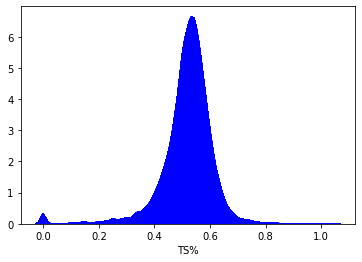

In [91]:
for y in yrs:
    subset = shooting2[shooting2['season'] == y]

    sns.distplot(shooting2["ts"], hist=False, kde=True,
             kde_kws = {'shade': True, 'linewidth': 1},
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'},
             axlabel = "TS%")

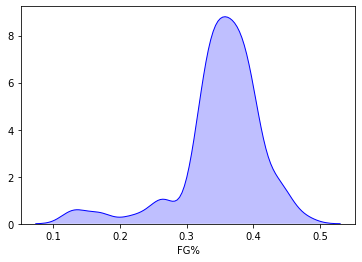

In [65]:
sns.distplot(shooting["fgpercent"], hist=False, kde=True,
             kde_kws = {'shade': True, 'linewidth': 1},
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'},
             axlabel = "FG%")